## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

## Understand the Data

### Cab Data

In [2]:
cab = pd.read_csv("Data\Cab_Data.csv")
cab.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [3]:
cab["profit"] = cab["Price Charged"] - cab["Cost of Trip"]
cab.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666


In [4]:
cab["Company"].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [5]:
cab["City"].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

### City Data

In [6]:
city = pd.read_csv("Data\City.csv")
city['Population'] = city['Population'].str.replace(',', '').astype(int)
city['Users'] = city['Users'].str.replace(',', '').astype(int)
city.head(2)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468


### Customer Data

In [7]:
customer = pd.read_csv("Data\Customer_ID.csv")
customer.head(2)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237


### Transaction Data

In [8]:
transaction = pd.read_csv("Data\Transaction_ID.csv")
transaction.head(2)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card


In [9]:
transaction["Payment_Mode"].unique()

array(['Card', 'Cash'], dtype=object)

## Merge and Visualize the Data

### Merge

In [10]:
df = pd.merge(cab, transaction, on='Transaction ID').merge(customer, on='Customer ID').merge(city, on='City')
df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885,24701
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885,24701


### Visualize 1.1

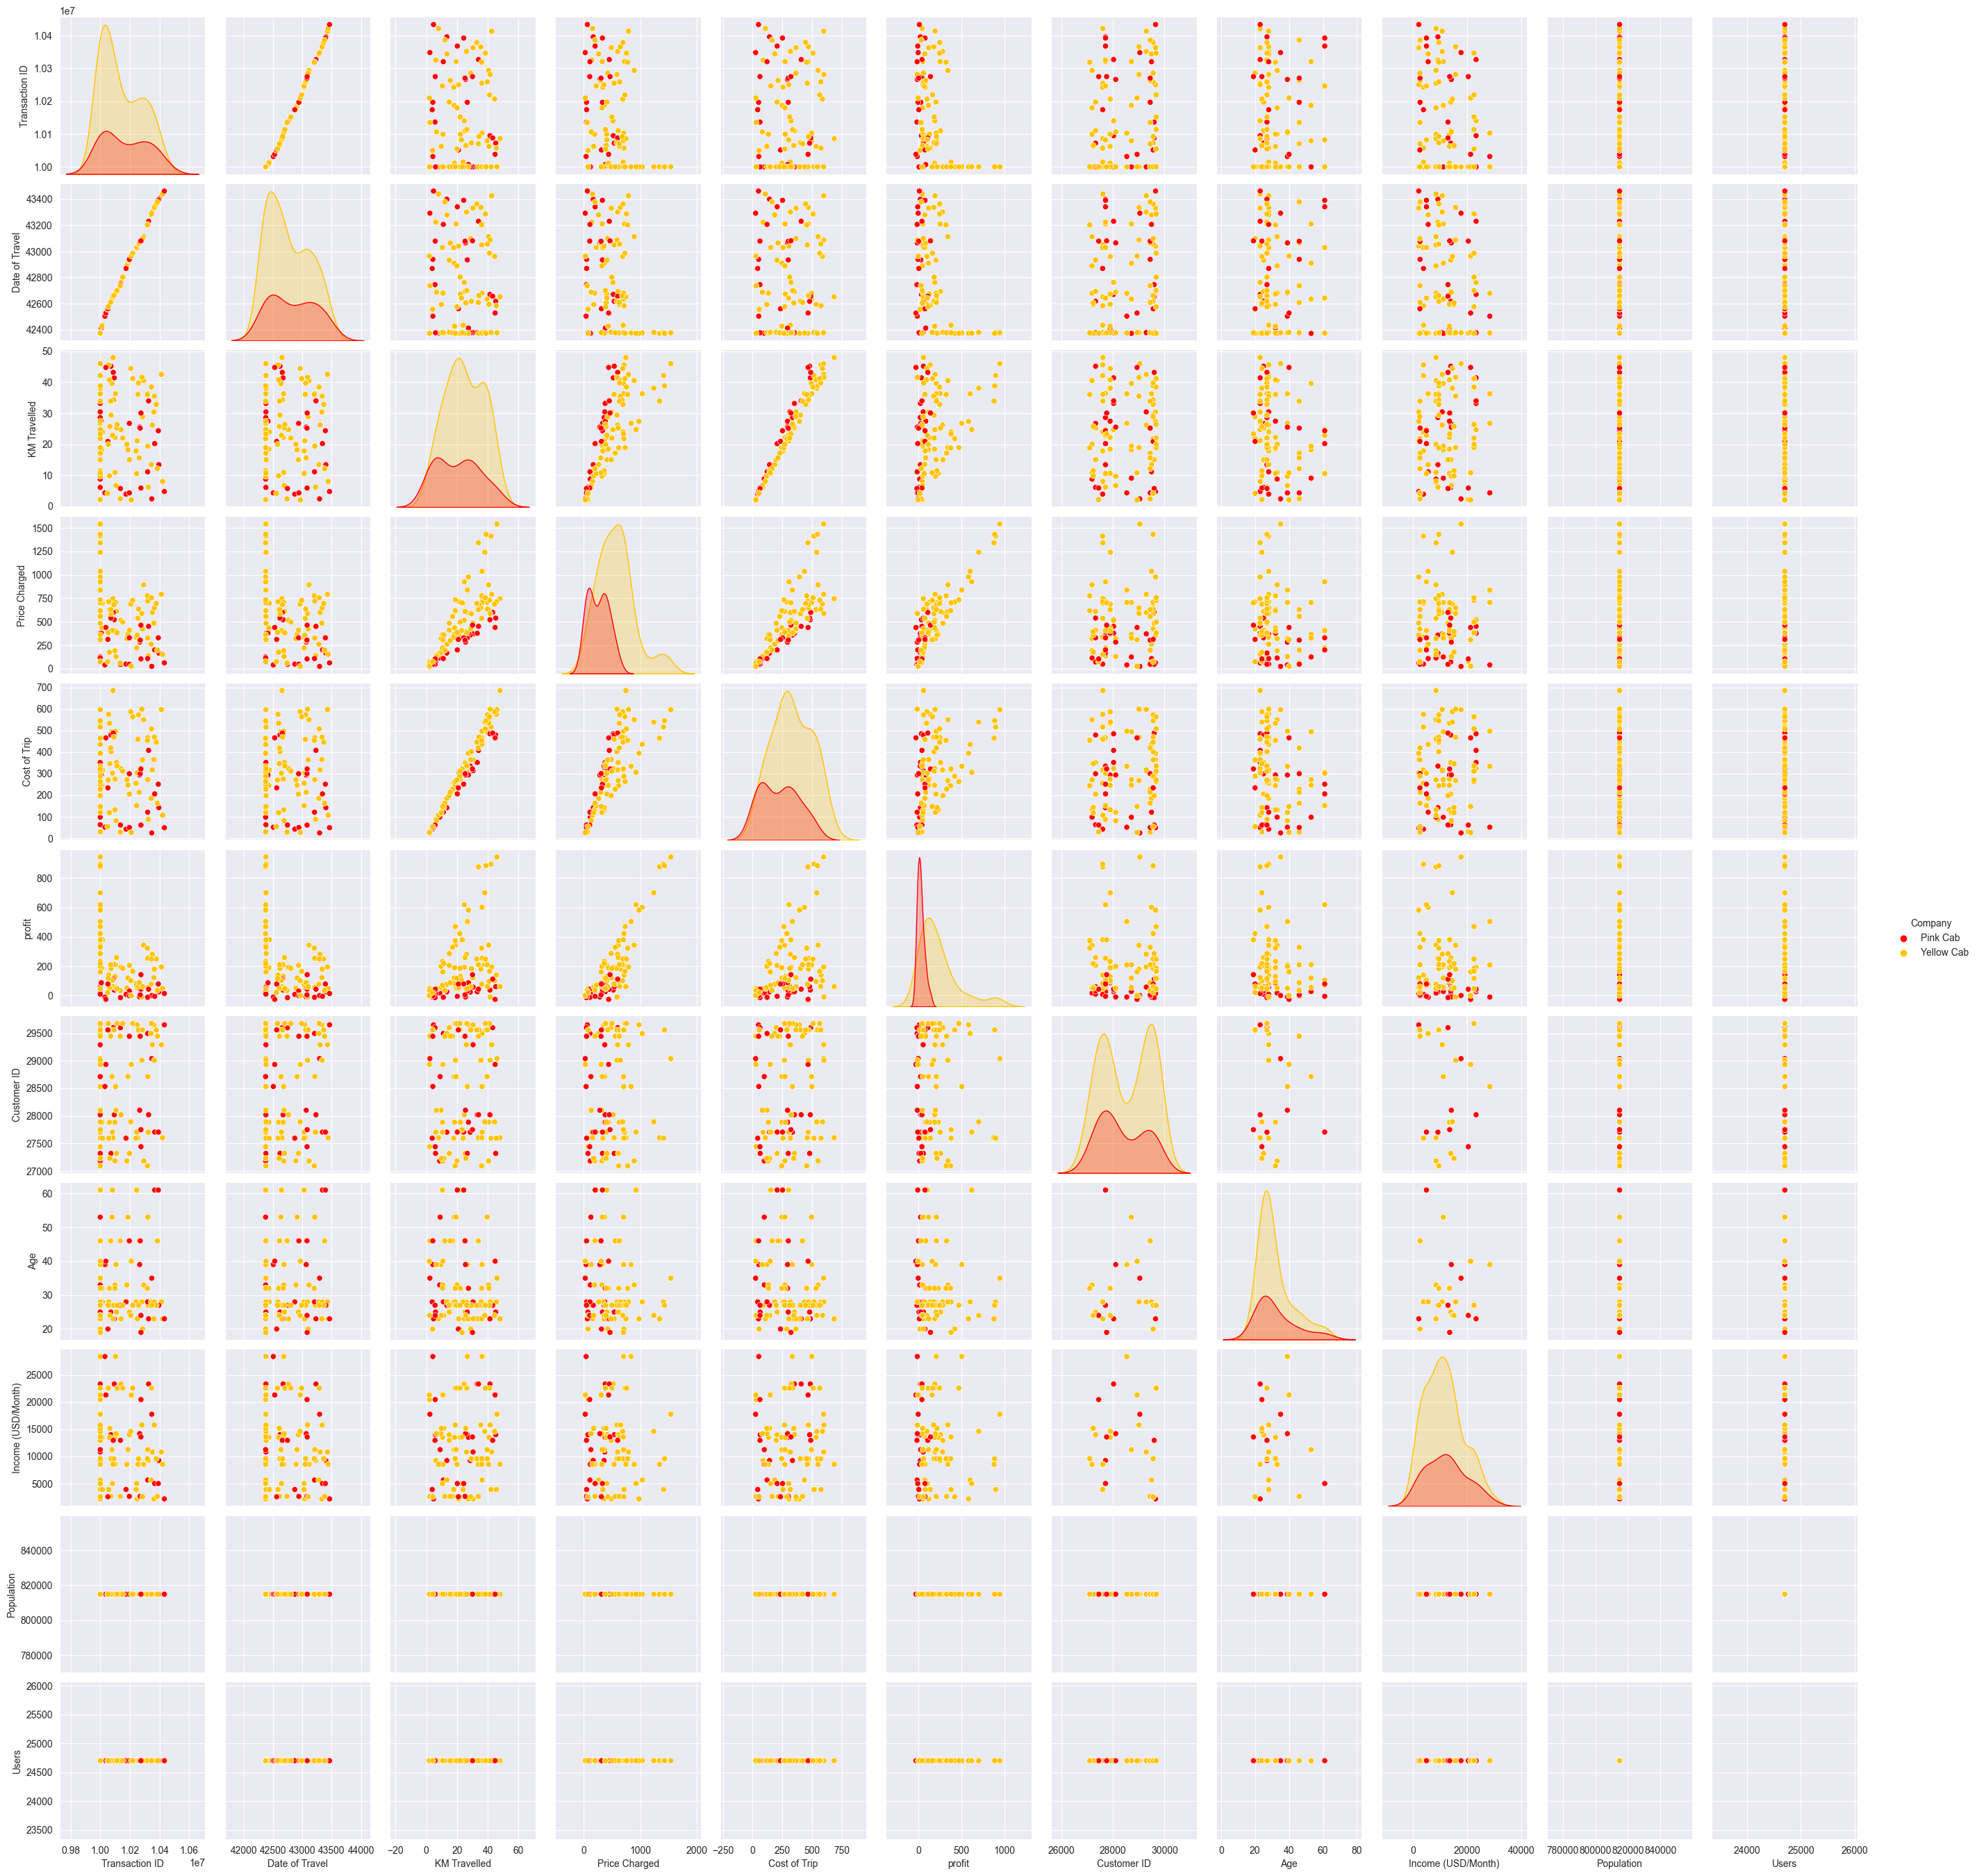

In [13]:
colors = {'Pink Cab': 'red', 'Yellow Cab': '#FFC300'}
sns.set_palette(sns.color_palette(colors.values()))
sns.set_style("darkgrid")
sns.pairplot(df.head(100), hue = 'Company')

### Visualize 1.2

In [22]:
mileage = df.groupby('Company')['KM Travelled'].sum().reset_index()
mileage

,Company,KM Travelled
0,Pink Cab,1911073.11
1,Yellow Cab,6199417.47


In [23]:
# sns pie chart on mileage


NameError: name 'plt' is not defined